In [11]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from analytical_models.gde_co import System, InputParameters

In [12]:
args = dict(
    T=298, 
    p0=1, 
    Q=30, # liquid flow rate , ml/min 
    flow_chan_length=0.02, 
    flow_chan_height=5e-3, 
    flow_chan_width=1.5e-3, 
    L=20e-6, 
    eps=0.9, 
    r=(25+50)/2 * 1e-9, # 25 - 50 nm 
    c_khco3=500, 
    c_k=500, 
    dic=10**-3.408, 
    method='CO2 eql'
)
ipt = InputParameters(**args)
S = System(ipt, mod=np)
r1 = S.solve(-0.7)

def dict_to_torch(d):
    for k, v in d.items():
        try:
            d[k] = torch.tensor(v)
        except TypeError:
            pass
    return d

ipt = InputParameters(**dict_to_torch(args))
dc = dict_to_torch(S.diffusion_coefficients)
se = dict_to_torch(S.salting_out_exponents)
erc = dict_to_torch(S.electrode_reaction_kinetics)
crr = dict_to_torch(S.chemical_reaction_rates)
S = System(ipt, diffusion_coefficients=dc, salting_out_exponents=se, electrode_reaction_kinetics=erc, chemical_reaction_rates=crr, mod=torch)
r2 = S.solve(torch.tensor([-0.7]))

for k in r1.keys():
    assert np.allclose(r1[k], r2[k].item(), rtol=1e-3, atol=1e-3)

This is working fine!

In [16]:
S.input_parameters.L.requires_grad = True
res, residuals = S.solve_current(800, return_residuals=True)
res['fe'].backward()
print(S.input_parameters.L.grad)

tensor(6.4396e+11)


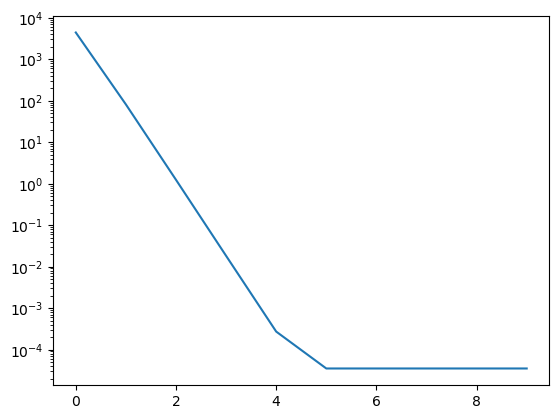

In [17]:
plt.plot(residuals)
plt.yscale('log')

Solve current also appears to be working fine